# PART 2: DATA PRE-PROCESSING

This notebook will process the retrieved NBA datasets through a series of cleaning and wrangling stages, based on initial explorations, to prepare for further stages down the project pipeline.

---

In [1]:
# Data Management
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Utils
import difflib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 2A: Setup

**Objective:** Load the compiled player statistics and lineup data into local dataframes.

---

In [2]:
player_df = pd.read_csv('./raw_comprehensive_stats.csv', sep=',', header=0, index_col=None)
player_df

,PLAYER,H,POS,TEAM,GP,MIN,POSS,USG%,%FGA,%3PA,...,opp_pnrrm_FGM,opp_pnrrm_FGA,opp_postup_FGM,opp_postup_FGA,opp_spotup_FGM,opp_spotup_FGA,opp_handoff_FGM,opp_handoff_FGA,opp_offscrn_FGM,opp_offscrn_FGA
0,Precious Achiuwa,6-8,F,TOR,71,1686,3330,17.8,18.4,13.3,...,13.0,32.0,12.0,29.0,59.0,159.0,NaN,NaN,4.0,10.0
1,Steven Adams,6-11,C,MEM,74,1953,4054,11.9,9.8,0.1,...,31.0,75.0,16.0,28.0,54.0,159.0,3.0,11.0,7.0,13.0
2,Bam Adebayo,6-9,C-F,MIA,55,1792,3630,24.7,23.1,0.5,...,7.0,19.0,15.0,31.0,56.0,137.0,4.0,8.0,3.0,13.0
3,Santi Aldama,6-11,F-C,MEM,30,319,678,15.8,17.3,17.6,...,NaN,NaN,NaN,NaN,7.0,19.0,NaN,NaN,NaN,NaN
4,LaMarcus Aldridge,6-11,C-F,BKN,47,1050,2213,21.9,23.8,7.4,...,8.0,26.0,10.0,24.0,33.0,81.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Thaddeus Young,6-8,F,TOR,50,801,1610,17.1,17.3,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,Trae Young,6-1,G,ATL,74,2582,5405,33.2,31.1,31.9,...,11.0,30.0,17.0,35.0,82.0,203.0,29.0,64.0,23.0,47.0
599,Omer Yurtseven,6-11,C,MIA,55,671,1365,18.9,19.5,1.6,...,7.0,18.0,8.0,17.0,24.0,51.0,NaN,NaN,NaN,NaN
600,Cody Zeller,6-11,F-C,NaN,27,355,742,15.3,13.3,1.5,...,NaN,NaN,4.0,9.0,9.0,25.0,NaN,NaN,NaN,NaN


In [3]:
lineup_df = pd.read_csv('./raw_lineup_stats.csv', sep=',', header=0, index_col=None)
lineup_df

,Lineups,TEAM,GP,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,PACE,PIE
0,".J. Green, .W. Barton, .A. Gordon, .N. Jokic, ...",DEN,40,743,121.3,112.5,8.8,71.3,2.51,23.2,25.0,75.5,51.9,0.1,59.8,62.9,100.36,55.5
1,".C. Paul, .J. Crowder, .D. Booker, .M. Bridges...",PHX,37,730,115.9,109.0,6.9,64.0,2.74,20.8,21.3,73.3,48.8,0.1,56.7,59.8,100.07,54.4
2,".M. Conley, .B. Bogdanovic, .R. Gobert, .R. O'...",UTA,41,648,117.9,109.9,8.0,57.5,1.72,17.7,27.0,72.3,51.3,0.1,59.6,62.6,100.29,55.0
3,".A. Horford, .M. Smart, .J. Brown, .J. Tatum, ...",BOS,34,443,118.8,94.2,24.6,63.3,2.18,20.7,26.4,76.4,54.2,0.1,59.7,61.6,99.08,64.0
4,".P. Beverley, .D. Russell, .K. Towns, .J. Vand...",MIN,36,439,120.2,107.4,12.8,58.6,1.93,18.5,33.3,70.6,51.9,0.1,56.9,59.4,99.52,53.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,".T. Thompson, .B. Hield, .O. Brissett, .T. Hal...",IND,1,12,85.7,120.0,-34.3,57.1,0.67,11.1,57.9,87.5,66.7,0.3,32.7,34.0,81.55,10.3
1996,".T. Young, .D. Murray, .D. White, .K. Johnson,...",SAS,5,12,73.3,114.3,-41.0,62.5,1.00,12.5,29.4,75.0,44.0,0.2,32.0,39.2,118.22,26.3
1997,".W. Carter Jr., .A. Schofield, .C. Anthony, .F...",ORL,4,12,111.5,111.1,0.4,70.0,1.40,20.0,27.3,57.1,44.0,0.2,59.5,63.7,104.28,49.4
1998,".W. Carter Jr., .C. Anthony, .R. Hampton, .F. ...",ORL,3,12,111.5,88.9,22.6,58.3,2.33,17.5,38.9,100.0,57.7,0.1,46.7,47.6,107.19,52.2


## 2B: Cursory Exploration

**OBJECTIVE:** In this section, the raw data is briefly explored to learn more about the dataset and draw initial insights that could inform any decision-making in the subsequent data wrangling, EDA, and other pre-processing steps.

---

#### Examine basic dataset characteristics:

In [4]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Columns: 180 entries, PLAYER to opp_offscrn_FGA
dtypes: float64(115), int64(45), object(20)
memory usage: 846.7+ KB


In [5]:
lineup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lineups    2000 non-null   object 
 1   TEAM       2000 non-null   object 
 2   GP         2000 non-null   int64  
 3   MIN        2000 non-null   int64  
 4   OffRtg     2000 non-null   float64
 5   DefRtg     2000 non-null   float64
 6   NetRtg     2000 non-null   float64
 7   AST%       2000 non-null   float64
 8   AST/TO     2000 non-null   float64
 9   AST Ratio  2000 non-null   float64
 10  OREB%      2000 non-null   float64
 11  DREB%      2000 non-null   float64
 12  REB%       2000 non-null   float64
 13  TO Ratio   2000 non-null   float64
 14  eFG%       2000 non-null   float64
 15  TS%        2000 non-null   float64
 16  PACE       2000 non-null   float64
 17  PIE        2000 non-null   float64
dtypes: float64(14), int64(2), object(2)
memory usage: 281.4+ KB


#### Explore attribute characteristics:

In [6]:
player_df.dtypes.to_dict()

{'PLAYER': dtype('O'),
 'H': dtype('O'),
 'POS': dtype('O'),
 'TEAM': dtype('O'),
 'GP': dtype('int64'),
 'MIN': dtype('int64'),
 'POSS': dtype('int64'),
 'USG%': dtype('float64'),
 '%FGA': dtype('float64'),
 '%3PA': dtype('float64'),
 '%FTA': dtype('float64'),
 '%REB': dtype('float64'),
 '%AST': dtype('float64'),
 '%BLKA': dtype('float64'),
 '%PFD': dtype('float64'),
 '%PTS': dtype('float64'),
 'AST': dtype('int64'),
 'PassesMade': dtype('int64'),
 'PassesReceived': dtype('int64'),
 'SecondaryAST': dtype('int64'),
 'PotentialAST': dtype('int64'),
 'ScreenAssists': dtype('int64'),
 'AST PTSCreated': dtype('int64'),
 'ASTAdj': dtype('int64'),
 'AST ToPass% Adj': dtype('float64'),
 'TOV': dtype('int64'),
 'PTS': dtype('int64'),
 'FGA': dtype('int64'),
 'FGM': dtype('int64'),
 'FG%': dtype('float64'),
 '%FGA2PT': dtype('float64'),
 '%PTS2PT': dtype('float64'),
 '%PTSPITP': dtype('float64'),
 '%PTS2PT MR': dtype('float64'),
 'RA_FGA': dtype('O'),
 'RA_FGM': dtype('O'),
 'PT_nonRA_FGA': dty

Based on the data types, it is apparent that some percentile statistics are represented in string format (due to '%') and must be cleaned to represent as floating values.

#### Examine unique values of categorical attributes:

In [7]:
print(len(player_df.PLAYER.unique()) == len(player_df.PLAYER))
# print(player_df.PLAYER.unique())

True


Although it was already handled during the data retrieval stage, it was imperative to first double-check that the player dataset did not have any multiple records for a single player (which could have resulted from mid-season trades / free-agency signings). Since there are no duplicates, the pre-processing stage won't involve any further aggregation of records on an individual player basis. 

In [8]:
for name in player_df.PLAYER.unique():
    
    # Find any similar matches of player name to double-check for hidden duplicates
    matches = difflib.get_close_matches(name, player_df.PLAYER.unique(), n=3, cutoff=0.85)
    
    # Print only similar matches while excluding exact matches 
    if len(matches) > 1 or (len(matches) == 1 and matches[0] != name):
        print(matches)

['Bogdan Bogdanovic', 'Bojan Bogdanovic']
['Bojan Bogdanovic', 'Bogdan Bogdanovic']
['BJ Johnson', 'Joe Johnson']
['Joe Johnson', 'BJ Johnson']
['Keldon Johnson', 'Keon Johnson']
['Keon Johnson', 'Keldon Johnson']
['Jaden McDaniels', 'Jalen McDaniels']
['Jalen McDaniels', 'Jaden McDaniels']


To verify there are not duplicate player records due to naming convention or typos, player names were examined against each other for similarity in the output above. A manual iteration of all the player names was also done to ensure this.

In [9]:
print(sorted(player_df.H.unique()))

['5-10', '5-11', '5-9', '6-0', '6-1', '6-10', '6-11', '6-2', '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9', '7-0', '7-1', '7-2', '7-3', '7-6']


Height information is listed in a categorical format and can be converted to a continuous float representation in the cleaning stages. From this cursory look, it is apparent that there are players from 5'9" through 7'3" and at 7'6".

In [10]:
player_df.POS.unique()

array(['F', 'C', 'C-F', 'F-C', 'G', 'F-G', 'G-F'], dtype=object)

Player position info is recorded in non-specific G/F/C format and consists of secondary position info as well. This can be wrangled through one-hot-encoding to better represent this attribute in the modeling stages.

In [11]:
print(len(player_df.TEAM.unique()))
print(player_df.TEAM.unique())
print(player_df.TEAM.value_counts())

31
['TOR' 'MEM' 'MIA' 'BKN' 'UTA' 'MIL' 'CLE' 'NOP' nan 'LAL' 'ORL' 'NYK'
 'WAS' 'PHX' 'DET' 'CHA' 'CHI' 'SAC' 'DEN' 'PHI' 'SAS' 'LAC' 'OKC' 'MIN'
 'DAL' 'IND' 'GSW' 'POR' 'ATL' 'BOS' 'HOU']
OKC    20
POR    20
DAL    18
CHI    17
CHA    17
DET    17
MEM    17
WAS    17
MIA    17
MIN    17
PHI    17
TOR    17
NOP    16
CLE    16
ATL    16
ORL    16
GSW    16
UTA    16
NYK    16
SAC    16
DEN    16
SAS    16
HOU    16
LAL    15
IND    15
PHX    15
BOS    15
LAC    15
MIL    15
BKN    15
Name: TEAM, dtype: int64


From above, it is apparent that there are missing team values for some players. This could be resulting from players logging minutes and statistics for a team this season, but ended up getting cut from the roster. These players can be examined further in the exploratory stages as they will likely be excluded from any modeling if their logged playing time this season was low. Apart from the null value, all 30 teams show up in the dataset.

In [12]:
player_df[player_df.TEAM.isnull()]['MIN'].describe()

count     110.000000
mean      116.727273
std       188.600929
min         1.000000
25%        15.250000
50%        40.500000
75%       143.500000
max      1191.000000
Name: MIN, dtype: float64

A deeper look into the currently unsigned players shows that 75% have logged 111 minutes or less. This further indicates that these players can be filtered out from the dataset.

In [13]:
lineup_df.Lineups.unique()

array(['.J. Green, .W. Barton, .A. Gordon, .N. Jokic, .M. Morris',
       '.C. Paul, .J. Crowder, .D. Booker, .M. Bridges, .D. Ayton',
       ".M. Conley, .B. Bogdanovic, .R. Gobert, .R. O'Neale, .D. Mitchell",
       ...,
       '.W. Carter Jr., .A. Schofield, .C. Anthony, .F. Wagner, .J. Suggs',
       '.W. Carter Jr., .C. Anthony, .R. Hampton, .F. Wagner, .J. Suggs',
       '.W. Hernangomez, .B. Ingram, .N. Alexander-Walker, .K. Lewis Jr., .T. Murphy III'],
      dtype=object)

In the lineup data, there are a total of 2000 lineups which will need to be filtered based on playing time to disclude low sample-size data. The lineup info will involve some additional cleaning as well, as player names need to be standardized to represent the same format as the naming convention in the player statistics data.

#### Examine missing values within player statistics:

In [14]:
def missing_val_counter(large_df):
    """Examines input dataframe's attributes for missing values and outputs dictionary with non-zero counts."""
    
    missing_dict = {}
     
    for col in large_df.columns:
        missing = large_df[col].isnull().sum()
        # Only include if attribute has missing values
        if missing != 0:  
            missing_dict[col] = missing

    return missing_dict

missing_val_counter(player_df)

{'TEAM': 110,
 'cns_2FGA': 38,
 'cns_2FGM': 38,
 'pullup_2FGA': 53,
 'pullup_2FGM': 53,
 'cns_3PA': 38,
 'cns_3PM': 38,
 'pullup_3PA': 53,
 'pullup_3PM': 53,
 'dr_0_2FGA': 22,
 'dr_0_2FGM': 22,
 'dr_0_3PA': 22,
 'dr_0_3PM': 22,
 'dr_1_2FGA': 48,
 'dr_1_2FGM': 48,
 'dr_1_3PA': 48,
 'dr_1_3PM': 48,
 'dr_2_2FGA': 63,
 'dr_2_2FGM': 63,
 'dr_2_3PA': 63,
 'dr_2_3PM': 63,
 'dr_3_6_2FGA': 62,
 'dr_3_6_2FGM': 62,
 'dr_3_6_3PA': 62,
 'dr_3_6_3PM': 62,
 'dr_7plus_2FGA': 208,
 'dr_7plus_2FGM': 208,
 'dr_7plus_3PA': 208,
 'dr_7plus_3PM': 208,
 'tch_0_2_2FGA': 20,
 'tch_0_2_2FGM': 20,
 'tch_0_2_3PA': 20,
 'tch_0_2_3PM': 20,
 'tch_2_6_2FGA': 30,
 'tch_2_6_2FGM': 30,
 'tch_2_6_3PA': 30,
 'tch_2_6_3PM': 30,
 'tch_6plus_2FGA': 151,
 'tch_6plus_2FGM': 151,
 'tch_6plus_3PA': 151,
 'tch_6plus_3PM': 151,
 'trsn_FGM': 176,
 'trsn_FGA': 176,
 'iso_FGM': 369,
 'iso_FGA': 369,
 'pnrbh_FGM': 307,
 'pnrbh_FGA': 307,
 'pnrrm_FGM': 378,
 'pnrrm_FGA': 378,
 'postup_FGM': 450,
 'postup_FGA': 450,
 'spotup_FGM': 161,


As `.info()` functionality was unavailable for the high-dimensional player statistical data, a helper function was created to manual iterate through an input dataframe and examine for missing value counts. There are several noteworthy points to make here.

First of all, there are over 70 attributes with at-least a single missing value, all the way up to nearly half of the players missing data. Although this might seem alarming on initial examination, it is important to keep in mind that this dataset still needs to be pre-processed by filtering out players that play minimal minutes throughout the season. This is because they are irrelevant to this study, as the focus is on finding meaningful NBA lineups, which won't be applicable for the league's journeymen, but rather consistent contributors to a roster. This usually is about half of any given roster. Therefore, this manual examination was setup through an explicit function, to be re-usable at a later stage, when the dataset undergoes further processing. At this initial checkpoint, it is important to keep in mind that due to the large number of attributes, there might be features that need to be eliminated, or examined further for missing-bias in the pre-processing stage.

#### Explore players' sample-size in statistical dataset:

In [15]:
ss = player_df[['PLAYER', 'TEAM', 'GP', 'MIN', 'POSS']].copy()
ss['MPG'] = round(ss.MIN / ss.GP, 1)
ss['PPG'] = round(ss.POSS / ss.GP, 1)

               GP          MIN         POSS         MPG         PPG
count  602.000000   602.000000   602.000000  602.000000  602.000000
mean    42.098007   959.898671  1996.795681   18.785382   39.180897
std     25.252180   797.308902  1650.270889    9.843120   20.251187
min      1.000000     1.000000     2.000000    1.000000    2.000000
25%     17.000000   178.750000   378.000000   10.900000   23.125000
50%     48.000000   858.500000  1795.500000   18.000000   38.100000
75%     65.000000  1638.750000  3420.500000   27.200000   56.800000
max     80.000000  2815.000000  5892.000000   41.000000   81.500000


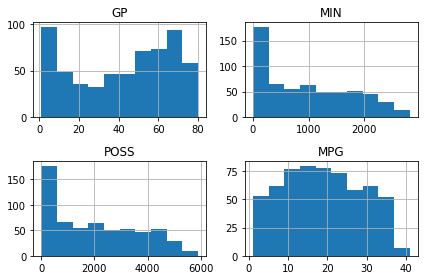

In [16]:
print(ss.describe())

ss[['GP', 'MIN', 'POSS', 'MPG']].hist()
plt.tight_layout()
plt.show()

Summary statistics and distributions of the attributes related to a player's logged-time attributes can aid the filtering process. A primary goal of the pre-processing stage is to only keep players relavant to the goal of the study: finding optimal & productive NBA lineups. Therefore, this info can be useful while removing players who are not meaninful contributors to a team on the court.

#### Explore sample-size in lineup dataset:

In [17]:
lineup_df[['GP', 'MIN']].describe()

,GP,MIN
count,2000.000000,2000.000000
mean,6.590500,34.482000
std,4.933557,50.943118
min,1.000000,12.000000
25%,3.000000,15.000000
50%,5.000000,21.000000
75%,8.000000,33.250000
max,44.000000,743.000000


# 2C: Data Cleaning

**OBJECTIVE:** In this section, the data source is cleaned appropriately, based on initial explorations, to prepare for further wrangling and other pre-processing stages.

---

#### Filter player-stats records for meaningful playing time:

In [18]:
# Filter out cut/unsigned players (not part of any team currently)
player_df = player_df[~player_df.TEAM.isnull()].reset_index(drop=True)
player_names = player_df[['PLAYER']].copy() # save copy of player names

In [19]:
def min_filterer(df, top_x):
    """Filters input dataframe for top 'x' amount of players in minutes logged, for each team."""
    
    teams = player_df.TEAM.unique().tolist()  
    high_min_plyrs = []

    # Sort team's players based on their minutes and grab top 'x'
    for team in teams:
        team_df = df[df.TEAM == team].sort_values(by='MIN', ascending=False)
        high_min_plyrs.extend(team_df.PLAYER.tolist()[0:top_x])
    
    # Filter out players not in high-min list
    df = df[df.PLAYER.isin(high_min_plyrs)]
    
    return df

player_df = min_filterer(player_df, 8)

In order to filter out low-minute players, an objective approach was used. Rather than relying on an arbitrarily chosen percentile to cutoff the minutes or games logged information, the top 8 players in minutes played, for each team, were selected. This is because 8-man rotations are the go-to standard for coaches in important games, especially in the playoffs. Therefore, this strategy was used for filtering out player records that had minimal logged time throughout the season.

#### Perform cleaning measures to standardize attributes and handle missing values:

In [20]:
# Retrieve col names if attribute is percentile-based
percentile_cols = [col for col in player_df.columns if '%' in col]

for col in percentile_cols:
    if player_df[col].dtypes == 'object':
        
        # Standardize null representations for edge-cases
        player_df[col] = player_df[col].replace('-', np.nan)
        
        # Standard data types to floating values
        player_df[col] = player_df[col].astype('float64')

Data types were standardized above, by cleaning edge case scenarios that had string-representations of null values.

In [21]:
# Retrieve col names if attribute is attempt-based
attempt_cols = [col for col in player_df.columns if (('FGA' in col or '3PA' in col) and '%' not in col)]
    
# Retrieve col names if attribute is make-based
make_cols = [col for col in player_df.columns if (('FGM' in col or '3PM' in col) and '%' not in col)]

# Replace null values with 0, as null represents no attempts in this scenario
for col in attempt_cols + make_cols:
    player_df[col] = player_df[col].fillna(0)

Field-goal attempt values are standardized in representing no-attempts with 0, as with other attributes in the dataset.

In [22]:
# Convert height info to integer format (inches)
player_df['H'] = player_df.H.map(lambda x: int(x.split('-')[0])*12 + float(x.split('-')[1]))
player_df['H'].head(3)

0    80.0
1    83.0
2    81.0
Name: H, dtype: float64

Height info was converted from raw string format of feet-in representation to a floating inches value. A manual conversion dict was not used to ensure code works for any height value that isn't currently in this season's dataset (i.e. 7-5). 

In [23]:
# Clean position values to standardize formatting
player_df['POS'] = player_df['POS'].replace({'F-G': 'G-F', 'C-F': 'F-C'}, regex=True)

player_df.POS.unique()

array(['F', 'C', 'F-C', 'G', 'G-F'], dtype=object)

Player position designations were standardized above for multiple-position values. This will make for more consistent exploratory analysis and will reduce an extra cleaning step, down the project pipeline, while encoding this categorical variable.

#### Perform cleaning measures on the lineup data:

In [24]:
lineup_df.head()

,Lineups,TEAM,GP,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,PACE,PIE
0,".J. Green, .W. Barton, .A. Gordon, .N. Jokic, ...",DEN,40,743,121.3,112.5,8.8,71.3,2.51,23.2,25.0,75.5,51.9,0.1,59.8,62.9,100.36,55.5
1,".C. Paul, .J. Crowder, .D. Booker, .M. Bridges...",PHX,37,730,115.9,109.0,6.9,64.0,2.74,20.8,21.3,73.3,48.8,0.1,56.7,59.8,100.07,54.4
2,".M. Conley, .B. Bogdanovic, .R. Gobert, .R. O'...",UTA,41,648,117.9,109.9,8.0,57.5,1.72,17.7,27.0,72.3,51.3,0.1,59.6,62.6,100.29,55.0
3,".A. Horford, .M. Smart, .J. Brown, .J. Tatum, ...",BOS,34,443,118.8,94.2,24.6,63.3,2.18,20.7,26.4,76.4,54.2,0.1,59.7,61.6,99.08,64.0
4,".P. Beverley, .D. Russell, .K. Towns, .J. Vand...",MIN,36,439,120.2,107.4,12.8,58.6,1.93,18.5,33.3,70.6,51.9,0.1,56.9,59.4,99.52,53.8


In [25]:
# Define cutoff value for lineup data filtering
lineup_min_thresh = 15

# Filter lineup data
lineup_df = lineup_df[(lineup_df.MIN >= lineup_min_thresh) & (lineup_df.GP > 1)].reset_index(drop=True)
lineup_df = lineup_df[['Lineups', 'TEAM', 'MIN', 'GP', 'OffRtg', 'DefRtg', 'NetRtg']]

Lineup data was filtered above based on threshold chosen from initial exploration in section 2B. As the minutes are heavily skewed, with a large majority of the lineups playing under 30 minutes, an extra condition was chosen to mitigate bias that can result from a single game: each lineup must have played in multiple games.

The attributes were then furter filtered to only keep the columns of interest. Since there won't be data available on every player combination lineup, the other metrics during modeling stages will be the cumulative player data for each lineup to keep consistent between available train data and what is going to be included in the test data: lineup combinations across players that haven't logged minutes together.

In [26]:
# Create separate df to manipulate naming format
names_df = player_names[['PLAYER']].copy()
    
# Create column to represent name in same format as lineup data    
names_df['f_last'] = names_df.PLAYER.map(lambda x: '.' + x.split(' ')[0][0] + '. ' + x.split(' ', 1)[1])

names_df.head(3)

,PLAYER,f_last
0,Precious Achiuwa,.P. Achiuwa
1,Steven Adams,.S. Adams
2,Bam Adebayo,.B. Adebayo


In [27]:
# Make dict of malformed name: clean name
names_dict = pd.Series(names_df.PLAYER.values, index=names_df.f_last).to_dict()

# Replace substring names with correct format
lineup_df['Lineups'] = lineup_df['Lineups'].replace(names_dict, regex=True)

Player names in lineup data have been cleaned to match the formatting represented in player statistical data. This will aid in the modeling stages when player stats will be linked with their lineup's rating info. However, this isn't complete, as there will be edge cases where two players share the same last name and first initial. A strategy to prevent / solve this issue is to use the player's team info during the name replacements. However, mid-season trades can render this plan useless and the dataset doesn't contain all the teams for a player's season. Therefore, these need to be manually parsed and fixed below.

In [28]:
names_df[names_df['f_last'].duplicated(keep=False)].reset_index(drop=True)

,PLAYER,f_last
0,Carmelo Anthony,.C. Anthony
1,Cole Anthony,.C. Anthony
2,LaMelo Ball,.L. Ball
3,Lonzo Ball,.L. Ball
4,Bogdan Bogdanovic,.B. Bogdanovic
5,Bojan Bogdanovic,.B. Bogdanovic
6,Mikal Bridges,.M. Bridges
7,Miles Bridges,.M. Bridges
8,Jared Butler,.J. Butler
9,Jimmy Butler,.J. Butler


In [ ]:
def replace_name(lineup_df, to_replace_list, team, replacement_str):
    """Replaces given list of names for a team, with the correct version."""
    
    for name in to_replace_list:
        lineup_df['Lineups'] = np.where((lineup_df['TEAM'] == team), lineup_df['Lineups'].replace({name: replacement_str}, regex=True), lineup_df['Lineups'])
    return lineup_df

lineup_df = replace_name(lineup_df, ['Carmelo Anthony'], 'DEN', 'Cole Anthony')
lineup_df = replace_name(lineup_df, ['Cole Anthony'], 'LAL', 'Carmelo Anthony')

lineup_df = replace_name(lineup_df, ['Lonzo Ball'], 'CHA', 'LaMelo Ball')
lineup_df = replace_name(lineup_df, ['LaMelo Ball'], 'CHI', 'Lonzo Ball')

lineup_df = replace_name(lineup_df, ['Bogdan Bogdanovic'], 'UTA', 'Bojan Bogdanovic')
lineup_df = replace_name(lineup_df, ['Bojan Bogdanovic'], 'ATL', 'Bogdan Bogdanovic')

lineup_df = replace_name(lineup_df, ['Miles Bridges'], 'PHX', 'Mikal Bridges')
lineup_df = replace_name(lineup_df, ['Mikal Bridges'], 'CHO', 'Miles Bridges')

lineup_df = replace_name(lineup_df, ['Jared Butler'], 'MIA', 'Jimmy Butler')
lineup_df = replace_name(lineup_df, ['Jimmy Butler'], 'UTA', 'Jared Butler')

lineup_df = replace_name(lineup_df, ['Seth Curry'], 'GSW', 'Stephen Curry')
lineup_df = replace_name(lineup_df, ['Stephen Curry'], 'BKN', 'Seth Curry')
lineup_df = replace_name(lineup_df, ['Stephen Curry'], 'PHI', 'Seth Curry')

lineup_df = replace_name(lineup_df, ['Danny Green'], 'GSW', 'Draymond Green')
lineup_df = replace_name(lineup_df, ['Draymond Green'], 'PHI', 'Danny Green')

lineup_df = replace_name(lineup_df, ['Jalen Green', 'Javonte Green', 'JaMychal Green', 'Jeff Green'], 'DAL', 'Josh Green')
lineup_df = lineup_df[~((lineup_df.TEAM == 'DEN') & (lineup_df.Lineups.str.contains('Green')))]  # remove lineups with Greens as data offers no meta info to parse both names
lineup_df = replace_name(lineup_df, ['Jalen Green', 'JaMychal Green', 'Jeff Green', 'Josh Green'], 'BKN', 'Javonte Green')
lineup_df = replace_name(lineup_df, ['Jalen Green', 'JaMychal Green', 'Jeff Green', 'Josh Green'], 'MIL', 'Javonte Green')
lineup_df = replace_name(lineup_df, ['Javonte Green', 'JaMychal Green', 'Jeff Green', 'Josh Green'], 'HOU', 'Jalen Green')

lineup_df = replace_name(lineup_df, ['Justin Holiday'], 'MIL', 'Jrue Holiday')
lineup_df = replace_name(lineup_df, ['Jrue Holiday'], 'IND', 'Justin Holiday')
lineup_df = replace_name(lineup_df, ['Jrue Holiday'], 'SAC', 'Justin Holiday')

lineup_df = replace_name(lineup_df, ['Keldon Johnson'], 'POR', 'Keon Johnson')
lineup_df = replace_name(lineup_df, ['Keldon Johnson'], 'LAC', 'Keon Johnson')
lineup_df = replace_name(lineup_df, ['Keon Johnson'], 'SAS', 'Keldon Johnson')

lineup_df = replace_name(lineup_df, ['Tyus Jones'], 'SAS', 'Tre Jones')
lineup_df = replace_name(lineup_df, ['Tre Jones'], 'MEM', 'Tyus Jones')

lineup_df = replace_name(lineup_df, ['Terance Mann'], 'OKC', 'Tre Mann')
lineup_df = replace_name(lineup_df, ['Tre Mann'], 'LAC', 'Terance Mann')

lineup_df = replace_name(lineup_df, ['Caleb Martin'], 'CHO', 'Cody Martin')
lineup_df = replace_name(lineup_df, ['Cody Martin'], 'MIA', 'Caleb Martin')

lineup_df = replace_name(lineup_df, ['Jalen McDaniels'], 'MIN', 'Jaden McDaniels')
lineup_df = replace_name(lineup_df, ['Jaden McDaniels'], 'CHO', 'Jalen McDaniels')

lineup_df = replace_name(lineup_df, ['Davion Mitchell'], 'UTA', 'Donovan Mitchell')
lineup_df = replace_name(lineup_df, ['Donovan Mitchell'], 'SAC', 'Davion Mitchell')

lineup_df = replace_name(lineup_df, ['Markieff Morris', 'Marcus Morris'], 'DEN', 'Monte Morris')
lineup_df = replace_name(lineup_df, ['Markieff Morris', 'Monte Morris'], 'LAC', 'Marcus Morris')
lineup_df = replace_name(lineup_df, ['Marcus Morris', 'Monte Morris'], 'MIA', 'Markieff Morris')

lineup_df = replace_name(lineup_df, ['Aaron Wiggins'], 'GSW', 'Andrew Wiggins')
lineup_df = replace_name(lineup_df, ['Andrew Wiggins'], 'OKC', 'Aaron Wiggins')

lineup_df = replace_name(lineup_df, ['Thaddeus Young'], 'ATL', 'Trae Young')
lineup_df = replace_name(lineup_df, ['Trae Young'], 'TOR', 'Thaddeus Young')
lineup_df = replace_name(lineup_df, ['Trae Young'], 'SAS', 'Thaddeus Young')

Through the manual verifications above, player names in the lineup data were accurately replaced to ensure the data maintained its integrity. This was extremely important to conduct as any misplaced player names can drastically impact the modeling stage, especially with a small number of records such as in this scenario. (Players that haven't been cross-checked based on above duplicates-investigation were filtered based on minutes in the player-stats cleaning and therefore do not need to be transformed as they will be filtered out further down the pipeline.)

In [30]:
lineup_df.head()

,Lineups,TEAM,MIN,GP,OffRtg,DefRtg,NetRtg
0,"Josh Green, Will Barton, Aaron Gordon, Nikola ...",DEN,743,40,121.3,112.5,8.8
1,"Chris Paul, Jae Crowder, Devin Booker, Mikal B...",PHX,730,37,115.9,109.0,6.9
2,"Mike Conley, Bogdan Bogdanovic, Rudy Gobert, R...",UTA,648,41,117.9,109.9,8.0
3,"Al Horford, Marcus Smart, Jaylen Brown, Jayson...",BOS,443,34,118.8,94.2,24.6
4,"Patrick Beverley, D'Angelo Russell, Karl-Antho...",MIN,439,36,120.2,107.4,12.8


# 2C: Data Munging -- Player Statistics

**OBJECTIVE:** In this section, the clean player statistical records are wrangled into appropriate molding to fit project objective.

---

#### Setup wrangling steps through helper functions and parsed attribute collection:

In [31]:
# Create player statistics copy to leave cleaned dataframe unmodified
tnsfmd_plyr_df = player_df.copy()

In [32]:
def per_basis_compute(df, col_to_modify, scaling_col, prefix, tag):
    """Takes in an input dataframe and scales according to given information."""
    
    if prefix == False:
        df[col_to_modify + tag] = round(df[col_to_modify] / df[scaling_col], 5)
    else:
        df[tag + col_to_modify] = round(df[col_to_modify] / df[scaling_col], 5)
    return df

def eff_compute(df, att_col, mk_col):
    """Computes make/attempt efficiency based on input info."""
    
    new_col_name = att_col[:-1] + '%'
    df[new_col_name] = round(df[mk_col] / df[att_col] * 100, 2)
    return df

def combine_per_basis_compute(df, col_list, new_col_name):
    """Takes in input list of columns to combine and scales based on total FGA."""
    
    summed_att = df[col_list[0]]
    for col in col_list[1:]:
        summed_att = summed_att + df[col]
    
    df[new_col_name] = round(summed_att / df['FGA'] * 100, 2)
    return df

The above helper functions will aid in the wrangling process to transform the desired data.

In [33]:
# Define attributes to be converted to per-possession basis
per_poss = [
    'PassesMade', 'PassesReceived', 'ScreenAssists', 'ASTAdj', 'TOV',
    'PTS', 'DRIVES', 'ElbowTouches', 'PostUps', 'PaintTouches', 'Dist. Miles Off', 'Dist. Miles Def',
]

# Define attributes to be converted to per-min basis
per_min = [
    'REB', 'Box Outs', 
    'STL', 'BLK', 'Deflections', 'Loose BallsRecovered', 'ChargesDrawn',  # Defensive activity
    'Contested2PT Shots', 'Contested3PT Shots', 'OppTOV', 'OppPF', 'OppFTA',  # Defensive activity
]

# Define attributes to be converted to per-FGA basis
per_FGA = [
    'RA_FGA', 'PT_nonRA_FGA', 'MR_FGA', 'cns_2FGA', 'pullup_2FGA', 'Corner3_FGA', 'ATB3_FGA', 'cns_3PA', 'pullup_3PA',
    'trsn_FGA', 'iso_FGA', 'pnrbh_FGA', 'pnrrm_FGA', 'postup_FGA', 'spotup_FGA', 'handoff_FGA', 'cuts_FGA', 'offscrn_FGA', 'putbk_FGA', 
]

# Define attributes to be converted to per-OppFGA basis
per_OppFGA = [
    'opp_RA_FGA', 'opp_PT_nonRA_FGA', 'opp_MR_FGA', 'opp_Corner3_FGA', 'opp_ATB3_FGA',
    'opp_iso_FGA', 'opp_pnrbh_FGA', 'opp_pnrrm_FGA', 'opp_postup_FGA', 'opp_spotup_FGA', 'opp_handoff_FGA', 'opp_offscrn_FGA'
]

# Define attributes to be converted to per-percentage basis
per_perc = [
    'FGA', 'FGM',  '3PA', '3PM', 'FTA', 'FTM',# to get 2-pt-fg% and 3-pt% and ft%
    'OppFGA', 'OppFGM',  'Opp3PA', 'Opp3PM', # get Opp2P% and Opp3%
    'opp_RA_FGA', 'opp_RA_FGM', 
    'opp_PT_nonRA_FGA', 'opp_PT_nonRA_FGM',
    'opp_MR_FGA', 'opp_MR_FGM',
    'opp_Corner3_FGA', 'opp_Corner3_FGM', 
    'opp_ATB3_FGA', 'opp_ATB3_FGM',
    'opp_iso_FGA', 'opp_iso_FGM', 'opp_pnrbh_FGA', 'opp_pnrbh_FGM', 'opp_pnrrm_FGA', 'opp_pnrrm_FGM', 'opp_postup_FGA',
    'opp_postup_FGM',  'opp_spotup_FGA', 'opp_spotup_FGM', 'opp_handoff_FGA', 'opp_handoff_FGM', 'opp_offscrn_FGA', 'opp_offscrn_FGM'
]

# Define attributes to be combined before conversion to per-FGA basis
combine_cols = [
    ['dr_1_2FGA', 'dr_1_3PA', 'dr_2_2FGA', 'dr_2_3PA'],  # combine to dr_1_2_fga / fga
    ['dr_3_6_2FGA', 'dr_3_6_3PA', 'dr_7plus_2FGA', 'dr_7plus_3PA'],  # combine to dr_3plus / fga
    ['tch_0_2_2FGA', 'tch_0_2_3PA'], # combine to get tch0-2/fga
    ['tch_2_6_2FGA', 'tch_2_6_3PA', 'tch_6plus_2FGA', 'tch_6plus_3PA'],  # combine to get tch2plus/fga
]

Attributes defined above will undergo its subsequent transformation to be forged into a more appropriate format for the study.

#### Execute transformations:

In [34]:
for col in tnsfmd_plyr_df.columns:
    if tnsfmd_plyr_df[col].dtypes == 'object' and col not in ['PLAYER', 'POS', 'TEAM']:
        tnsfmd_plyr_df[col] = tnsfmd_plyr_df[col].astype('float')

In [35]:
# Per-Possession transformations
for attr in per_poss:
    tnsfmd_plyr_df = per_basis_compute(tnsfmd_plyr_df, attr, 'POSS', False, '/POSS')

# Per-Minute transformations
for attr in per_min:
    tnsfmd_plyr_df = per_basis_compute(tnsfmd_plyr_df, attr, 'MIN', False, '/MIN')

# Per-FGA transformations
for attr in per_FGA:
    tnsfmd_plyr_df = per_basis_compute(tnsfmd_plyr_df, attr, 'FGA', True, '%')
    
# Per-OpponentFGA transformations
for attr in per_OppFGA:
    tnsfmd_plyr_df = per_basis_compute(tnsfmd_plyr_df, attr, 'OppFGA', True, '%')
    
# Efficiency-percentage computations
for i in range(0, len(per_perc), 2):
    tnsfmd_plyr_df = eff_compute(tnsfmd_plyr_df, per_perc[i], per_perc[i+1])
    
# Combined Per-FGA transformations
tnsfmd_plyr_df = combine_per_basis_compute(tnsfmd_plyr_df, combine_cols[0], '%dr_1_2_fga')
tnsfmd_plyr_df = combine_per_basis_compute(tnsfmd_plyr_df, combine_cols[1], '%dr_3plus_fga')
tnsfmd_plyr_df = combine_per_basis_compute(tnsfmd_plyr_df, combine_cols[2], '%tch_0_2_fga')
tnsfmd_plyr_df = combine_per_basis_compute(tnsfmd_plyr_df, combine_cols[3], '%tch_2plus_fga')

# Other transformations
tnsfmd_plyr_df['2P%'] = round((tnsfmd_plyr_df['FGM'] - tnsfmd_plyr_df['3PM']) / (tnsfmd_plyr_df['FGA'] - tnsfmd_plyr_df['3PA']) * 100, 2)
tnsfmd_plyr_df['3P%'] = round(tnsfmd_plyr_df['3PM'] / tnsfmd_plyr_df['3PA'] * 100, 2)
tnsfmd_plyr_df['Opp2P%'] = round((tnsfmd_plyr_df['OppFGM'] - tnsfmd_plyr_df['Opp3PM']) / (tnsfmd_plyr_df['OppFGA'] - tnsfmd_plyr_df['Opp3PA']) * 100, 2)
tnsfmd_plyr_df['Opp3P%'] = round(tnsfmd_plyr_df['Opp3PM'] / tnsfmd_plyr_df['Opp3PA'] * 100, 2)

The goal of this project is to study NBA lineups with the objective of maximizing fit and performance. To that extent, player statistical data and lineup info was obtained through extensive scraping. However, to be able to assess unique player combination-lineups, players need to be transformed into a particular archetype based on their stats, for an easier translatable study with random combinations of players. Therefore, one of the most important steps in the pre-processing stage is wrangling the attributes of interest, into formats that would aid this process. Above, attributes were standardized amongst players on a per-ATTR basis. For offense-related stats that aren't directly related to scoring attempts, these were converted to a per-possession basis. For attempt-related stats on both offense and defense (with regards to opponent's attempts), there were standardized to the total FGA. In areas that made sense, efficiency percentiles were computed--however, the caveat here is that, although these will be helpful during exploratory analysis, they most likely will need to be truncated before implementing any unsupervised models because players can yield null-values in efficiency-percentage calculations if they had 0 makes and 0 attempts. And to minimize null values in some other tracking statistics, attributes were combined where possible (such as with dribble and touch stats, which were re-stratified). 

Through the data munging steps, player statistics have been transformed to reflect more of a player's play-style, and less so the extent of how well they do in a particular category. There are still attributes that reflect the latter, but as unsupervised techniques which rely on distance-based metrics can become biased and influenced by players' differences in stats that arise from more playing time, etc. Therefore, this cleaning procedure was strategically designed in order to ensure any unsupervised learning techniques can parse through the players and evaluate them through a more balanced lens between play-style and ability.

#### Finalize attributes in cleaned player statistical data:

In [36]:
tnsfmd_plyr_df = tnsfmd_plyr_df[[
    
    'PLAYER', 'H', 'POS', 'TEAM', 'GP', 'MIN', 'POSS',  # Utils
    
    '%FGA', '%3PA', '%FTA', '%REB', '%AST', '%BLKA', '%PFD', '%PTS',  # Usage stats
    
    'PassesMade/POSS', 'PassesReceived/POSS', 'ScreenAssists/POSS', 'ASTAdj/POSS', 'TOV/POSS',  # Passing stats
    
    'PTS/POSS', '2P%', '3P%', 'FT%', '%PTSFT',  # Base scoring info
    
    '%RA_FGA', '%PT_nonRA_FGA', '%MR_FGA',  # 2-Pt scoring zones
    '%cns_2FGA',  '%pullup_2FGA',  # 2-Pt scoring styles
    
    '%Corner3_FGA', '%ATB3_FGA',  # 3-Pt scoring zones
    '%cns_3PA', '%pullup_3PA',  # 3-Pt scoring styles
    
    '2FGM%UAST', '3FGM%UAST',  # Scoring dependency
    
    '%dr_1_2_fga', '%dr_3plus_fga', '%tch_0_2_fga', '%tch_2plus_fga',  # Scoring style (dribble & touch-time)
    
    '%trsn_FGA', '%iso_FGA', '%pnrbh_FGA', '%pnrrm_FGA', '%postup_FGA', '%spotup_FGA',  # Offensive-style
    '%handoff_FGA', '%cuts_FGA', '%offscrn_FGA', '%putbk_FGA', 'DRIVES/POSS', 'drives_PASS%', 
    
    'Avg Sec PerTouch', 'Avg Drib PerTouch', 'ElbowTouches/POSS', 'PostUps/POSS', 'PaintTouches/POSS',  # Offensive activity (touches)
    
    'PTS PerElbow Touch', 'PTS PerPost Touch', 'PTS PerPaint Touch',  # Touches-efficiency
    
    'Dist. Miles Off/POSS', 'Dist. Miles Def/POSS',  # Player movement
    
    'REB/MIN', 'ContestedREB%', 'AVG REBDistance', 'Box Outs/MIN',  # Rebound-related stats
    
    'STL/MIN', 'BLK/MIN', 'Deflections/MIN', 'Loose BallsRecovered/MIN', 'ChargesDrawn/MIN',  # Defensive activity
    'Contested2PT Shots/MIN', 'Contested3PT Shots/MIN', 'OppTOV/MIN', 'OppPF/MIN', 'OppFTA/MIN', 
    
    'Opp2P%', '%opp_RA_FGA', 'opp_RA_FG%', '%opp_PT_nonRA_FGA', 'opp_PT_nonRA_FG%', '%opp_MR_FGA', 'opp_MR_FG%',  # Opponent 2-Pt efficiency
    'Opp3P%', '%opp_Corner3_FGA', 'opp_Corner3_FG%', '%opp_ATB3_FGA', 'opp_ATB3_FG%',  # Opponent 3-Pt efficiency
    
    '%opp_iso_FGA', 'opp_iso_FG%', '%opp_pnrbh_FGA', 'opp_pnrbh_FG%', '%opp_pnrrm_FGA', 'opp_pnrrm_FG%', '%opp_postup_FGA', 'opp_postup_FG%',  # Defended styles
    '%opp_spotup_FGA', 'opp_spotup_FG%', '%opp_handoff_FGA', 'opp_handoff_FG%', '%opp_offscrn_FGA', 'opp_offscrn_FG%'
]]

Cleaned attributes were finalized in the cell block above, to be written out for use in further exploration and modeling. As the scraped dataset had over 200 features to begin with, there was bound to be some redundant features that could be truncated even before a formal feature selection process (which will still be conducted as a modeling pre-requisite). 

For any scoring related statistic, attributes were condensed to reflect two pieces of information: proportion of the specific type of attempt to overall attempts, and efficiency (i.e., if several features are related to a player's catch-and-shoot related shots, this information was condensed to proportion of catch-and-shoot shots to overall shots, and their efficiency at it -- again, to have a balance between play-style and ability within that particular play-style). This strategy of data engineering has another benefit as well--statistics will be standardized amongst each player for easier comparison.

For any player activity or tracking-related info, attributes were converted to either per-possession or per-minute basis, depending on whether the attribute was an offense-related stat or a general stat. 

Along with player utility info (i.e., name, height, etc.), attributes related to their usage info was also retained. These features specifically convey the proportion of the player's contribution in the overarching stat compared to their team.

Lastly, in order to account for the other side of the ball, defensive stats were also retained in similar fashion to scoring stats--prioritizing balance between style and efficiency. 

The features created from the munging stage made the attributes that were used to create them no longer necessary, and therefore weren't retained. In addition to those, other noteworthy attributes that were truncated are reasoned below:
- `USG%` is an advanced stat computed using some metrics already reflected in the feature set
- Baseline `AST` info was not used as a more advanced assist metric, that was adjusted to reflect secondary assists was instead used; Other assist-related metrics such as `AST PTSCreated`, `AST ToPass% Adj` were redundant to the passing metrics present within the feature set
- `%FGA2PT`,`%PTS2PT`, `%PTSPITP`, `%PTS2PT MR`, `%PTS3PT` were removed to prevent redundancy with %FGA versions of the broken down metrics within each zone and region
- 'Makes' information was also truncated as efficiency percentiles capture this information
- Dribble-related statistics for 0 dribbles were removed as this was redundant with 'catch-and-shoot' metrics
- `2FGM%AST`, `3FGM%AST` that convey how much of the field goals are assisted by teammates are indirectly reflected through `2FGM%UAST`, `3FGM%UAST` (unassisted)
- Although some driving-related metrics were related, `drives_FGA`, `drives_FGM` were removed as this would be already reflected within Paint field goal information
- `DEFWS` was removed as this was the only advanced defensive metric in the study, and isn't known for its prowess in assessing defense among NBA analysts
- `OppPTSFB`, `OppPTSPAINT` were removed as there was no way to scale these based on OppPTS information; removing prevents any bias during ML techniques for players who played more minutes, and therefore give up more points

# 2D: Data Munging -- Lineup Statistics

**OBJECTIVE:** In this section, the clean lineup data is wrangled into appropriate molding to fit project objective.

---

In [37]:
# Create copy to leave cleaned dataframe unmodified
tnsfmd_lnp_df = lineup_df.copy()

#### Construct helper functions for lineup wrangling steps:

In [60]:
def lineup_filter(lineup):
    """Takes in input lineup and assesses whether each name is within player statistics data."""
    
    players = lineup.split(', ')
    names = tnsfmd_plyr_df.PLAYER.tolist()
    
    for plyr in players:
        if plyr not in names:
            return False
    return True

def stats_compiler(lineup):
    """Gathers and combines individual player statistics for each player in a lineup."""
    
    players = lineup.split(', ')
    
    # Filter player stats to include only players within input lineup and aggregate
    filt_df = tnsfmd_plyr_df[tnsfmd_plyr_df.PLAYER.isin(players)][tnsfmd_plyr_df.columns.tolist()[7:]]
    agg = filt_df.mean().tolist()
       
    return agg

#### Drop lineups that contain players not retained through individual statistical data:

In [56]:
tnsfmd_lnp_df = tnsfmd_lnp_df.drop(tnsfmd_lnp_df[tnsfmd_lnp_df.Lineups.map(lineup_filter) == False].index).reset_index(drop=True)

#### Compile individual player statistics for each lineup:

In [ ]:
# tnsfmd_lnp_df['test'] = tnsfmd_lnp_df.Lineups.map(stats_compiler)
# tnsfmd_lnp_df[tnsfmd_plyr_df.columns.tolist()[7:]] = pd.DataFrame(tnsfmd_lnp_df.test.tolist())
# tnsfmd_lnp_df = tnsfmd_lnp_df.drop(columns=['test'])

# 2E: Output

**OBJECTIVE:** Output the processed data files into CSVs for further analytical and modeling stages down the project pipeline.

---

In [39]:
tnsfmd_plyr_df

,PLAYER,H,POS,TEAM,GP,MIN,POSS,%FGA,%3PA,%FTA,...,%opp_pnrrm_FGA,opp_pnrrm_FG%,%opp_postup_FGA,opp_postup_FG%,%opp_spotup_FGA,opp_spotup_FG%,%opp_handoff_FGA,opp_handoff_FG%,%opp_offscrn_FGA,opp_offscrn_FG%
0,Precious Achiuwa,80.0,F,TOR,71,1686,3330,18.4,13.3,16.6,...,0.01090,40.62,0.00987,41.38,0.05414,37.11,0.00000,NaN,0.00340,40.00
1,Steven Adams,83.0,C,MEM,74,1953,4054,9.8,0.1,21.8,...,0.02078,41.33,0.00776,57.14,0.04404,33.96,0.00305,27.27,0.00360,53.85
2,Bam Adebayo,81.0,F-C,MIA,55,1792,3630,23.1,0.5,40.0,...,0.00619,36.84,0.01009,48.39,0.04461,40.88,0.00261,50.00,0.00423,23.08
4,LaMarcus Aldridge,83.0,F-C,BKN,47,1050,2213,23.8,7.4,21.4,...,0.01296,30.77,0.01196,41.67,0.04038,40.74,0.00000,NaN,0.00000,NaN
5,Nickeil Alexander-Walker,77.0,G,UTA,64,1460,3004,25.5,31.5,16.4,...,0.00422,45.45,0.00422,72.73,0.05138,43.28,0.01265,27.27,0.01150,26.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Robert Williams III,81.0,F-C,BOS,61,1804,3666,11.2,0.1,12.2,...,0.01000,24.24,0.00818,37.04,0.06424,30.66,0.00424,7.14,0.00576,31.58
483,Christian Wood,81.0,F,HOU,68,2094,4443,23.7,20.1,31.2,...,0.00932,27.03,0.01562,53.23,0.05368,40.38,0.00554,50.00,0.00680,37.04
485,Delon Wright,77.0,G,ATL,75,1409,2902,10.6,11.0,9.1,...,0.00510,23.08,0.00510,53.85,0.05135,45.80,0.01490,34.21,0.01215,35.48
489,Trae Young,73.0,G,ATL,74,2582,5405,31.1,31.9,43.7,...,0.00621,36.67,0.00725,48.57,0.04203,40.39,0.01325,45.31,0.00973,48.94


In [40]:
tnsfmd_lnp_df

,Lineups,TEAM,MIN,GP,OffRtg,DefRtg,NetRtg
0,"Josh Green, Will Barton, Aaron Gordon, Nikola ...",DEN,743,40,121.3,112.5,8.8
1,"Chris Paul, Jae Crowder, Devin Booker, Mikal B...",PHX,730,37,115.9,109.0,6.9
2,"Mike Conley, Bogdan Bogdanovic, Rudy Gobert, R...",UTA,648,41,117.9,109.9,8.0
3,"Al Horford, Marcus Smart, Jaylen Brown, Jayson...",BOS,443,34,118.8,94.2,24.6
4,"Patrick Beverley, D'Angelo Russell, Karl-Antho...",MIN,439,36,120.2,107.4,12.8
...,...,...,...,...,...,...,...
1485,"Tim Hardaway Jr., Trey Burke, Kristaps Porzing...",DAL,15,3,118.8,96.9,21.9
1486,"Terrence Ross, Gary Harris, Markelle Fultz, We...",ORL,15,3,91.2,97.2,-6.0
1487,"Tristan Thompson, Buddy Hield, De'Aaron Fox, C...",SAC,15,5,91.2,97.1,-5.9
1488,"Tristan Thompson, Harrison Barnes, Buddy Hield...",SAC,15,6,112.5,88.2,24.3


In [41]:
# tnsfmd_plyr_df.to_csv('./cln_comprehensive_stats.csv', sep=',', index=False)

# tnsfmd_lnp_df.to_csv('./cln_lineup_stats.csv', sep=',', index=False)